In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils
from keras.preprocessing import image

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train = pd.read_csv("./data/train.csv")

print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("./data/test.csv")

print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = (train.iloc[:, 1:].values).astype('float32')
y_train = (train.iloc[:, 0].values).astype('int32')

X_test = test.values.astype('float32')

In [5]:
print(X_train.shape)
X_train

(42000, 784)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
print(y_train.shape)
y_train

(42000,)


array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

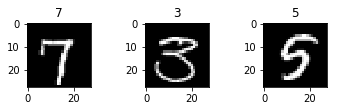

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)


for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [9]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

In [10]:
mean_px = X_train.mean().astype('float32')
std_px  = X_train.std().astype('float32')

def standardize(x):
    return (x - mean_px) / std_px

In [11]:
y_train = np_utils.to_categorical(y_train)
y_train.shape

(42000, 10)

In [12]:
# seed
np.random.seed(42)

In [13]:
# Create the ANN
model = Sequential()

model.add(Lambda(standardize, input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
gen = image.ImageDataGenerator()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [2]:
history=model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=val_batches, nb_val_samples=val_batches.n)

NameError: name 'model' is not defined

In [17]:
history.history['acc']

[0.93414055882317626]

In [18]:
model.evaluate(X_val, y_val)

4200/4200 [==============================] - 0s 29us/step


[0.32631728077928224, 0.9107142857142857]

In [19]:
model2 = Sequential()

model2.add(Lambda(standardize, input_shape=(28, 28, 1)))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.15))
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.15))
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop')

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
__________

In [20]:
history=model2.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=val_batches, nb_val_samples=val_batches.n)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, validation_data=<keras.pre..., epochs=1, validation_steps=4200)`
  


Epoch 1/1
37800/37800 [==============================] - 201s 5ms/step - loss: 0.0680 - val_loss: 0.2162


In [21]:
model2.evaluate(X_val, y_val)

4200/4200 [==============================] - 0s 48us/step


0.21608686033431412